# DAT561 Final Project (Fall 2023)

**Note**: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.


**Part 1**: 
75 points (85 points with the extra credits in the Bonus Question)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset here
# Please use your path and dataset for this parts!
# You may use Tkinter library
Property_details = pd.read_csv("Property_details.csv")
Order_details = pd.read_csv("Order_details.csv", 
                            encoding = "ISO-8859-1",         # Use encoding to prevent error.
                            na_values = {'onsiteprice': 0})  # Define na_values in advance for 'onsiteprice' column for Q4.

In [3]:
Property_details.head(5)


,propertyid,propertyname,address,city,country,zipcode,propertytype,starrating,latitude,longitude,url
0,1771651,Mediteran Bungalow Galeb,Vukovarska 7,Omis,Croatia,21310.0,Holiday parks,4,43.440124,16.682505,https://www.booking.com/hotel/hr/bungalow-luxu...
1,177167,Hotel Polonia,Plac Teatralny 5,Torun,Poland,NaN,Hotels,3,53.012329,18.603800,https://www.agoda.com/en-gb/hotel-polonia/hote...
2,1771675,Rifugio Sass Bece,"Belvedere del Pordoi,1",Canazei,Italy,38032.0,Hotels,3,46.477920,11.813350,http://www.booking.com/hotel/it/rifugio-sass-b...
3,177168,Madalena Hotel,Mykonos,Mykonos,Greece,84600.0,Hotels,3,37.452316,25.329849,https://www.agoda.com/en-gb/madalena-hotel/hot...
4,1771718,Pension Morenfeld,Mair im Korn Strasse 2,Lagundo,Italy,39022.0,Hotels,3,46.682780,11.131736,http://www.booking.com/hotel/it/pension-morenf...


In [4]:
Order_details.head(5)

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,roomamenities,maxoccupancy,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed",Cancellation policy,...,Air conditioning: ;Alarm clock: ;Carpeting: ;C...,1,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019
1,50672149,8328096,10/12/2019 15:47,11/30/2019,1,1,Vacation Home,636.09,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Cancellation policy,...,Air conditioning: ;Closet: ;Fireplace: ;Free W...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019
2,50643430,8323442,10/12/2019 15:47,12/20/2019,1,1,Vacation Home,591.74,"Shower, Kitchenette, 2 bedrooms, 1 double bed ...",Extra low price! (non-refundable),...,Air conditioning: ;Closet: ;Dishwasher: ;Firep...,4,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019
3,50650317,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,881.48,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,1,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019
4,50650318,7975,10/12/2019 15:47,12/28/2019,1,1,Standard Triple Room,897.53,"Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds",Extra low price! (non-refundable),...,Air conditioning: ;Clothes rack: ;Coffee/tea m...,3,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019


### Question 1

**Part (a)**: How many properties are there in the region with the zip code of 84600? 

**Part (b)**: What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84600?


In [5]:
# Part (a):
zip_code_filter = Property_details['zipcode'] == 84600  
properties_in_zip = Property_details[zip_code_filter]

number_of_properties = properties_in_zip.shape[0]

print(f"Number of region with the zip code of 84600:{number_of_properties}")

Number of region with the zip code of 84600:104


In [6]:
# Part (b):

properties_in_zip_84600 = Property_details[Property_details['zipcode'] == 84600]

# Calculate the required statistics
mean_rating = round(properties_in_zip_84600['starrating'].mean(),2)
std_dev_rating = round(properties_in_zip_84600['starrating'].std(),2)
median_rating = properties_in_zip_84600['starrating'].median()
min_rating = properties_in_zip_84600['starrating'].min()
max_rating = properties_in_zip_84600['starrating'].max()

# Print the results
print(f"Mean Star Rating: {mean_rating}")
print(f"Standard Deviation of Star Ratings: {std_dev_rating}")
print(f"Median Star Rating: {median_rating}")
print(f"Minimum Star Rating: {min_rating}")
print(f"Maximum Star Rating: {max_rating}")

Mean Star Rating: 3.46
Standard Deviation of Star Ratings: 0.71
Median Star Rating: 4.0
Minimum Star Rating: 2
Maximum Star Rating: 4


### Question 2

**Part (a)**: Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Fri”).

**Part (b)**: Which weekday receives an above-average number of reservations compared to all records?

In [7]:
# Part (a):
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date'])

Order_details['weekday'] = Order_details['reservation date'].dt.day_name()

print(Order_details.head())

         id  propertycode       dtcollected reservation date  los  guests  \
0  50677497        634876  10/12/2019 15:46       2019-11-02    1       1   
1  50672149       8328096  10/12/2019 15:47       2019-11-30    1       1   
2  50643430       8323442  10/12/2019 15:47       2019-12-20    1       1   
3  50650317          7975  10/12/2019 15:47       2019-12-28    1       1   
4  50650318          7975  10/12/2019 15:47       2019-12-28    1       1   

               roomtype  onsiteprice  \
0           Double Room        82.36   
1         Vacation Home       636.09   
2         Vacation Home       591.74   
3  Standard Triple Room       881.48   
4  Standard Triple Room       897.53   

                                     ratedescription  \
0     Room size: 15 mÂ²/161 ftÂ², Shower, 1 king bed   
1  Shower, Kitchenette, 2 bedrooms, 1 double bed ...   
2  Shower, Kitchenette, 2 bedrooms, 1 double bed ...   
3  Room size: 20 mÂ²/215 ftÂ², Shower, 3 single beds   
4  Room size: 20

In [8]:
# Part (b):
reservations_per_weekday = Order_details['weekday'].value_counts()

average_reservations = reservations_per_weekday.mean()

above_average_weekdays = reservations_per_weekday[reservations_per_weekday > average_reservations]

print("Weekdays with above-average number of reservations:")
print(above_average_weekdays)

Weekdays with above-average number of reservations:
Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Name: weekday, dtype: int64


### Question 3

**Part (a)**: In “roomamenities”, what are the top 10 common room amenities in single rooms (rooms with a maxoccupancy of 1)? A what about the 10 least common room amenities in single rooms? (For example, Air conditioning is one amenity)

**Part (b)**: What percentage does each type of room amenities occupy of the total number of reservations for single rooms?(Do not use the total number of amenities as denominator）

In [9]:
# We've decided to display our output for 3(a) and 3(b) together

# Create a dictionary to hold the counts of each amenity
amenity_counts ={}

# Filter the dataframe for single rooms with a maxoccupancy of 1
single_rooms = Order_details[Order_details['maxoccupancy'] == 1]

# Iterate over each row in the single rooms DataFrame
for amenities in single_rooms['roomamenities']:
    # Check if amenities is a string before splitting
    if isinstance(amenities, str):
        # Split the amenities string into a list using the delimiter ': ;' as the separator
        split_amenities = amenities.split(': ;')
        # Iterate over each amenity in the list
        for amenity in split_amenities:
            # Convert the amenity to lowercase and strip whitespace
            amenity = amenity.lower().strip()
            # Increment the count of the amenity in the dictionary
            if amenity in amenity_counts:
                amenity_counts[amenity] += 1
            else: 
                amenity_counts[amenity] = 1
            
# Create a new datafram called amenities_df by using amenity_counts 
amenities_df = pd.DataFrame(amenity_counts, index = ['count']).T
amenities_df

# Create a new column named 'percentage'. We use the total number of reservations for single rooms as denominator
amenities_df['percentage'] = amenities_df['count'] / single_rooms.shape[0] * 100

# Get the top 10 common room ammenities
print('\n')
print('The top 10 common room ammenities')
print(amenities_df.sort_values('count', ascending=False).head(10))

# Get the least 10 common room ammenities
print('\n')
print('The least 10 common room ammenities')
print(amenities_df.sort_values('count', ascending=True).head(10))



The top 10 common room ammenities
                          count  percentage
air conditioning          83913   97.550570
in-room safe box          83913   97.550570
                          83913   97.550570
free wi-fi in all rooms!  82341   95.723088
hair dryer                61079   71.005580
telephone                 57610   66.972797
toiletries                57397   66.725180
desk                      55988   65.087189
heating                   55773   64.837247
closet                    52029   60.484771


The least 10 common room ammenities
                          count  percentage
open air bath privileges     12    0.013950
hot tub                      13    0.015113
vending machine              16    0.018600
humidifier                   21    0.024413
tv [in bathroom]             24    0.027900
internet access ï¿?lan       26    0.030226
scale                        35    0.040688
air purifier                 46    0.053476
first aid kit                56    0.065101
in

### Question 4

**Part (a)**: For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

**Part (b)**: For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Max_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [10]:
# Part (a):
median_value = Order_details.groupby('propertycode')['onsiteprice'].median()
median_value = pd.DataFrame(median_value)
median_value.columns = ['Median']
Order_details = pd.merge(median_value, Order_details, on='propertycode', how='right')
Order_details['replaced_onsiteprice'] = Order_details['onsiteprice']
Order_details['replaced_onsiteprice'].fillna(Order_details['Median'], inplace=True)
Order_details.drop('Median', axis=1, inplace=True)
Order_details.head(5)

# Check the result.
result = Order_details.loc[Order_details['onsiteprice'].isnull(), ['propertycode', 'onsiteprice', 'replaced_onsiteprice']].head(10)
result

,propertycode,onsiteprice,replaced_onsiteprice
60,1198059,NaN,100.320
77,1198059,NaN,100.320
134,6825,NaN,128.595
135,6825,NaN,128.595
158,517461,NaN,180.835
216,5943546,NaN,260.190
228,7975,NaN,897.530
274,7975,NaN,897.530
275,7975,NaN,897.530
276,7975,NaN,897.530


In [11]:
# Part (b):
max_min = Order_details.groupby('propertycode')['replaced_onsiteprice'].agg(['max', 'min'])
max_min.columns = ['Maximum', 'Minimum']

# Calculate global minimum and maximum of 'Maximum' column
global_max = max_min['Maximum'].max()
global_min = max_min['Maximum'].min()

# Create 'Normalized Maximum' column
max_min['Normalized Maximum'] = (max_min['Maximum'] - global_min) / (global_max - global_min)
Order_details = pd.merge(max_min, Order_details, left_index = True, right_on='propertycode', how='right')
Order_details.head(5)

,Maximum,Minimum,Normalized Maximum,propertycode,id,dtcollected,reservation date,los,guests,roomtype,...,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice
0,107.70,82.36,0.005307,634876,50677497,10/12/2019 15:46,2019-11-02,1,1,Double Room,...,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36
1,636.09,636.09,0.034545,8328096,50672149,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,...,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday,636.09
2,591.74,311.71,0.032091,8323442,50643430,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,...,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday,591.74
3,1055.92,881.48,0.057777,7975,50650317,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday,881.48
4,1055.92,881.48,0.057777,7975,50650318,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday,897.53


In [12]:
Order_max_min = Order_details[['id','propertycode','Maximum','Minimum','Normalized Maximum']]
Order_max_min.head(5)

,id,propertycode,Maximum,Minimum,Normalized Maximum
0,50677497,634876,107.70,82.36,0.005307
1,50672149,8328096,636.09,636.09,0.034545
2,50643430,8323442,591.74,311.71,0.032091
3,50650317,7975,1055.92,881.48,0.057777
4,50650318,7975,1055.92,881.48,0.057777


In [13]:
Order_max_min.to_csv("Max_Min Price.csv", index=False)

### Question 5

**Part (a)**: A party of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .

**Part (b)**: If this party does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [14]:
# Part (a):
# Select hotels from 'Property_details' and get their property ID's as a list
hotel_list = Property_details.loc[Property_details['propertytype'] == "Hotels"]['propertyid'].to_list()

# Define a combined condition for filtering 'Order_details'
combined_condition = (
        (Order_details['maxoccupancy'] >= 3) &
        (Order_details['closed'] == 'N') &
        (Order_details['hotelblock'] != 'Sold out') &
        (Order_details['propertycode'].isin(hotel_list))
)
    
# Apply the combined conditions and count unique property codes
unique_property_count = Order_details[combined_condition]['propertycode'].nunique()
unique_property_count

3085

In [15]:
# Part (b):
combined_condition_2 = (
        (Order_details['maxoccupancy'] >= 3) &
        (Order_details['closed'] == 'N') &
        (Order_details['hotelblock'] != 'Sold out') &
        (Order_details['propertycode'].isin(hotel_list)) &
        (Order_details['Maximum'] <= 150)
)

# Apply all the conditions and find out the unique numbers of propertycode.
Order_details.loc[combined_condition_2]['propertycode'].nunique()

1372

### Bonus Question:

Merge data, filter, groupby, merge three times

**Part (a)**: For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Part (b)**: For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, rating, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

**Hint**: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [16]:
Order_details.head(5)

,Maximum,Minimum,Normalized Maximum,propertycode,id,dtcollected,reservation date,los,guests,roomtype,...,ispromo,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice
0,107.70,82.36,0.005307,634876,50677497,10/12/2019 15:46,2019-11-02,1,1,Double Room,...,Y,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36
1,636.09,636.09,0.034545,8328096,50672149,10/12/2019 15:47,2019-11-30,1,1,Vacation Home,...,N,N,0.00,NaN,media:M3diAproxy@173.44.164.126:80,NaN,NaN,10/13/2019,Saturday,636.09
2,591.74,311.71,0.032091,8323442,50643430,10/12/2019 15:47,2019-12-20,1,1,Vacation Home,...,N,N,0.00,NaN,media:M3diAproxy@173.44.166.122:80,NaN,NaN,10/13/2019,Friday,591.74
3,1055.92,881.48,0.057777,7975,50650317,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,NaN,NaN,10/13/2019,Saturday,881.48
4,1055.92,881.48,0.057777,7975,50650318,10/12/2019 15:47,2019-12-28,1,1,Standard Triple Room,...,N,N,0.00,NaN,media:M3diAproxy@209.242.219.141:80,Free breakfast for {3},NaN,10/13/2019,Saturday,897.53


In [17]:
# Part (a):
all_data = pd.merge(Order_details,Property_details,left_on = 'propertycode',right_on = 'propertyid',how = 'inner')

In [18]:
def most_expensive_property(hotel):
    return hotel.loc[hotel['replaced_onsiteprice'].idxmax()]

most_expensive_properties = all_data.groupby('country').apply(most_expensive_property)
average_onsiteprice_by_country = all_data.groupby('country')['replaced_onsiteprice'].mean().reset_index()
most_expensive_properties = most_expensive_properties.drop(columns=['country'])

expensive_hotel = pd.merge(most_expensive_properties, average_onsiteprice_by_country, on='country',suffixes=('_most_expensive', '_average'))
result_6a = expensive_hotel[['id','propertyname','ratedescription','city','country','zipcode','address','replaced_onsiteprice_average']]
result_6a.head(5)

,id,propertyname,ratedescription,city,country,zipcode,address,replaced_onsiteprice_average
0,69488710,Hotel Auriga,"Room size: 65 mÂ²/700 ftÂ², Balcony/terrace, S...",Lech,Austria,6764.0,Omesberg 330,157.257542
1,74247055,Hotel Roosendaelhof,"Room size: 40 mÂ²/431 ftÂ², Non-smoking, Separ...",Geel,Belgium,2440.0,Stationsstraat 50,149.972076
2,62123220,Aspen Golf and Ski Resort,"Room size: 54 mÂ²/581 ftÂ², Balcony/terrace, B...",Razlog,Bulgaria,2760.0,Betolovoto Aspen Golf,79.638210
3,72085681,Hotel Marmont - Adults Only,"Free Breakfast, Free Wi-Fi, Extra low price! (...",Split,Croatia,21000.0,Zadarska 13,214.548661
4,74459242,Hilton Park Nicosia Hotel,"Room size: 70 mÂ²/753 ftÂ², City view, Balcony...",Egkomi,Cyprus,NaN,"1 Achaion Street,",165.806433


In [19]:
# Part (b):
def cheapest_property(hotel):
    return hotel.loc[hotel['replaced_onsiteprice'].idxmin()]

cheapest_properties = all_data.groupby('country').apply(cheapest_property)
average_onsiteprice_by_country = all_data.groupby('country')['replaced_onsiteprice'].mean().reset_index()
cheapest_properties = cheapest_properties.drop(columns=['country'])

cheap_hotel = pd.merge(cheapest_properties, average_onsiteprice_by_country, on='country',suffixes=('_cheapest', '_average'), how = 'inner')
result_6b = cheap_hotel[['id','propertyname','ratedescription','city','country','zipcode','address','replaced_onsiteprice_average']]
result_6b.head(5)

,id,propertyname,ratedescription,city,country,zipcode,address,replaced_onsiteprice_average
0,77653595,Dolomitenhotel,"Room size: 22 mÂ²/237 ftÂ², Balcony/terrace, S...",Lienz,Austria,9900.0,2 Dolomitenstrasse,157.257542
1,70220544,ibis budget Blankenberge,Room size: 14 mÂ²/151 ftÂ²,Blankenberge,Belgium,8370.0,Kerkstraat 120,149.972076
2,70138124,Family Hotel Natalis,"Room size: 18 mÂ²/194 ftÂ², Shower, 1 double bed",Hisarya,Bulgaria,4180.0,20 Geo Milev Str.,79.638210
3,69915912,Hotel Aurora,"Room size: 24 mÂ²/258 ftÂ², Shower and bathtub...",Pula,Croatia,52100.0,Put od Fortica 98,214.548661
4,75553704,Bellapais Monastery Village,"Room size: 18 mÂ²/194 ftÂ², Sea view, Balcony/...",Ozankoy,Cyprus,9944.0,Bellapais Yolu Girne,165.806433


### Part 2 (25 Points)

For this part, we look at the logic and how you solve the problems. 

***Part (a):*** 

    1- You need to find "5" interesting business questions based on the datasets. Please make sure that these quastions are not similar with other groups...     
    2- Write Python code to answer the questions.    
    3- Visualize your results for each question. 
    

***Part (b):***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (5 points)
    2. You need to answer these five questions using Python and the two datasets. (5 points)
    3. You need to have at least "5" graphs to visualize your insights. (6 points)
    4. Your executive summary should be well-written. (6 points)
    5. Your results and business insights should be interesting and meaningful. (3 points)


**Note**: You may use this cell to write your 5 questions

**Question 1:** Is there a seasonal fluctuation for the number of hotel reservations?

**Question 2:** Is there any correlation between the room type and the selection of breakfast?

**Question 3:** How many hotels are there in top 10 countries?

**Question 4:** Is higher discount leading to higher housing utilisation(defined by actual occupancy/maximum occupancy)

**Question 5:** Would higher star rating for property leads to higher onsite price?


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(2, 41518.25, 'Avg. = 41468.2')

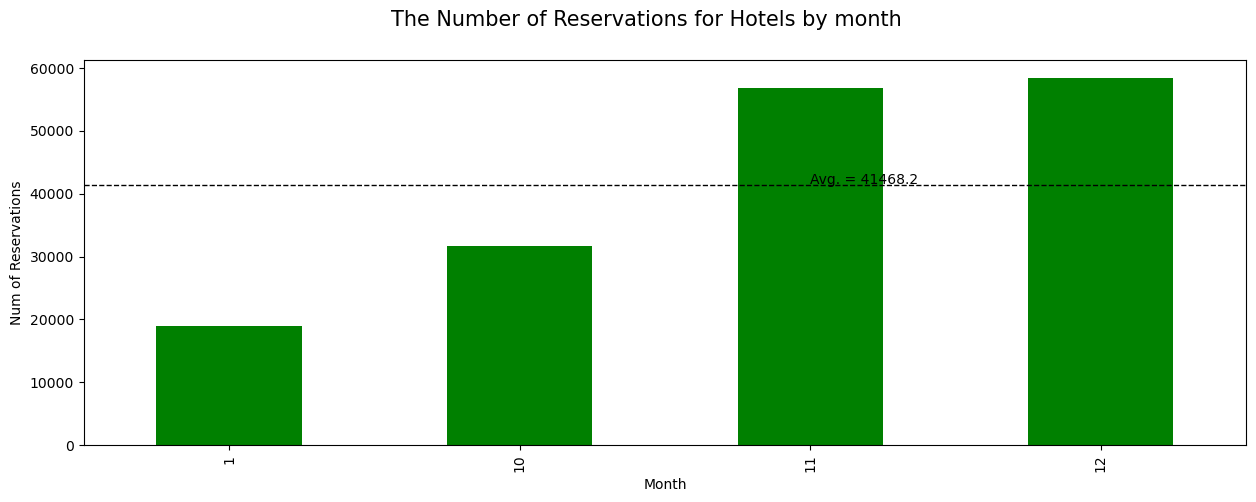

In [21]:
# Your code to answer Question 1

# Convert to datetime
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date'])

# Extract month
Order_details['reservation month'] = Order_details['reservation date'].dt.month

q1 = Order_details.groupby('reservation month')['id'].count().sort_values()

fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle("The Number of Reservations for Hotels by month", size = 15)

q1.plot(kind = 'bar', x = 'reservation month', color = 'green', ax = ax)
ax.set(xlabel = 'Month', ylabel = 'Num of Reservations')

ax.axhline(q1.mean(), color = 'black', linestyle = '--', linewidth = 1)
ax.annotate("Avg. = %.1f" %q1.mean(), xy = (2, q1.mean()+50))

# fig

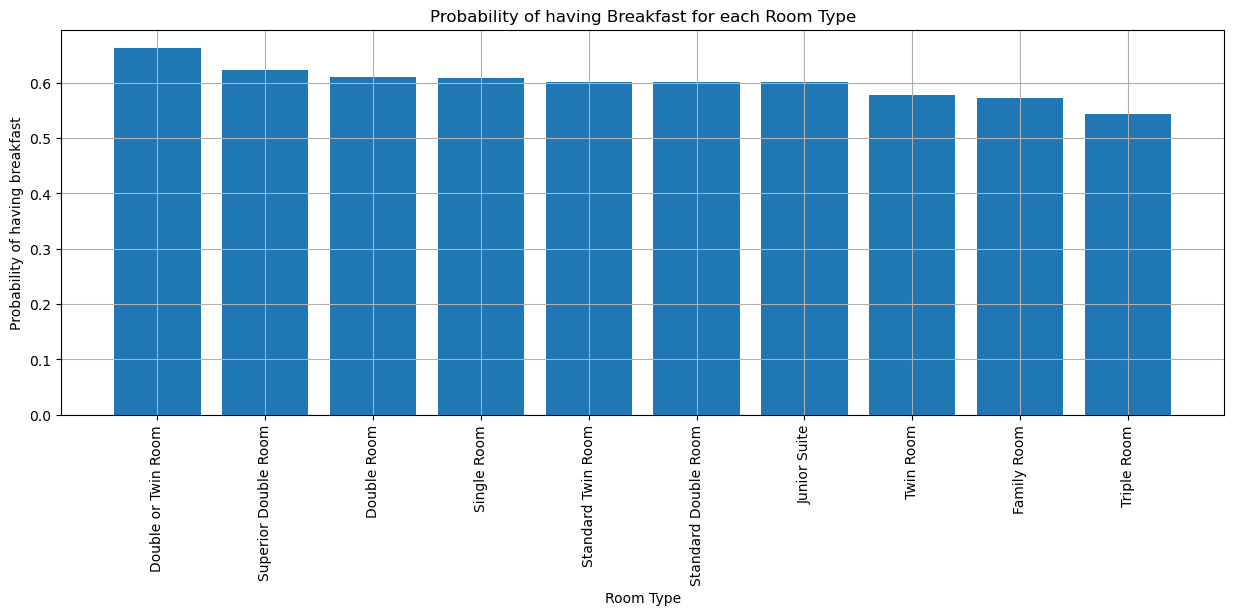

In [22]:
# Your code to answer Question 2
Breakfast_RT = Order_details[['mealinclusiontype', 'roomtype']].copy()

Breakfast_RT['BreakfastOrNot'] = Breakfast_RT['mealinclusiontype'].apply(lambda x: 0 if pd.isna(x) else 1)

num = Breakfast_RT['roomtype'].value_counts().head(10)
num = pd.DataFrame(num)
num.columns = ['count']
num = num.reset_index()
num.rename(columns={'index': 'roomtype'}, inplace=True)

Breakfast_RT = Breakfast_RT[Breakfast_RT['roomtype'].isin(num['roomtype'])]

q2 = Breakfast_RT.groupby('roomtype')['BreakfastOrNot'].mean().sort_values(ascending=False)
q2 = pd.DataFrame(q2)
q2.columns = ['BreakfastOrNot']
q2 = q2.reset_index()

plt.figure(figsize=(15, 5))
plt.bar(q2['roomtype'], q2['BreakfastOrNot'])

plt.title("Probability of having Breakfast for each Room Type")
plt.ylabel("Probability of having breakfast")
plt.xlabel("Room Type")
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.show()

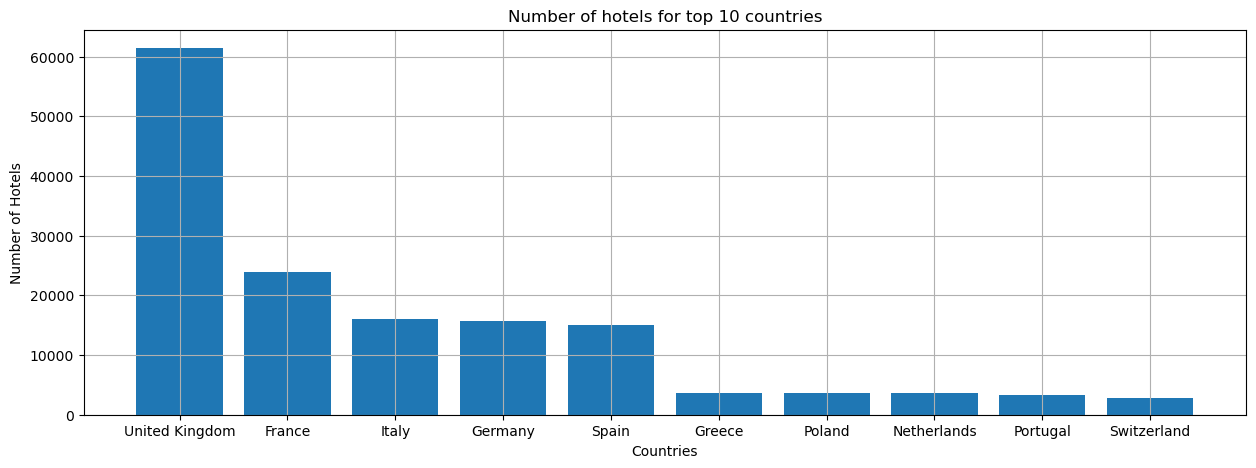

In [23]:
# Your code to answer Question 3
Num_Hotel_Country = all_data[['id', 'country']].copy()

Top_Country = Num_Hotel_Country['country'].value_counts().head(10)
Top_Country = pd.DataFrame(Top_Country)
Top_Country.columns = ['count']
Top_Country = Top_Country.reset_index()
Top_Country.rename(columns={'index': 'country'}, inplace=True)  

q3 = Top_Country

plt.figure(figsize=(15, 5))
plt.bar(q3['country'], q3['count'])  

plt.title("Number of hotels for top 10 countries")
plt.ylabel("Number of Hotels")
plt.xlabel("Countries")
plt.grid(True)

# Show the plot
plt.show()

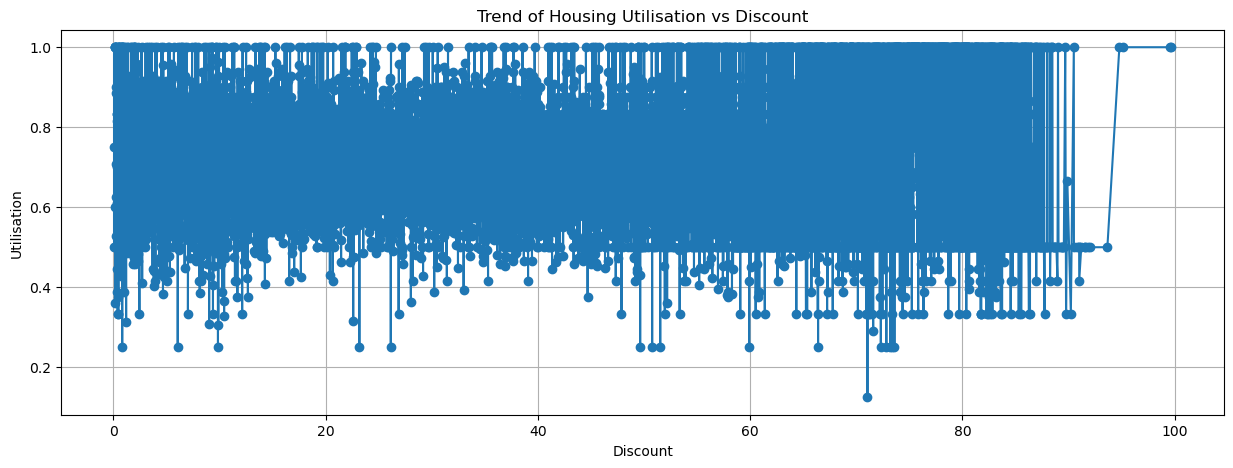

In [24]:
# Your code to answer Question 4

filtered_data = Order_details[Order_details['discount'] != 0]
Housing_utilisation = filtered_data[['id','guests','maxoccupancy','discount']].copy()
Housing_utilisation['utilisation'] = Housing_utilisation['guests']/Housing_utilisation['maxoccupancy']
Housing_utilisation.head(5)
q4 = Housing_utilisation.groupby('discount')['utilisation'].mean()
q4 = pd.DataFrame(q4)
q4.columns = ['utilisation']

q4 = q4.reset_index()
plt.figure(figsize=(15, 5))
plt.plot(q4['discount'], q4['utilisation'],  marker='o')

# Adding titles and labels
plt.title("Trend of Housing Utilisation vs Discount")
plt.ylabel("Utilisation")
plt.xlabel("Discount")
plt.grid(True)

# Show the plot
plt.show()

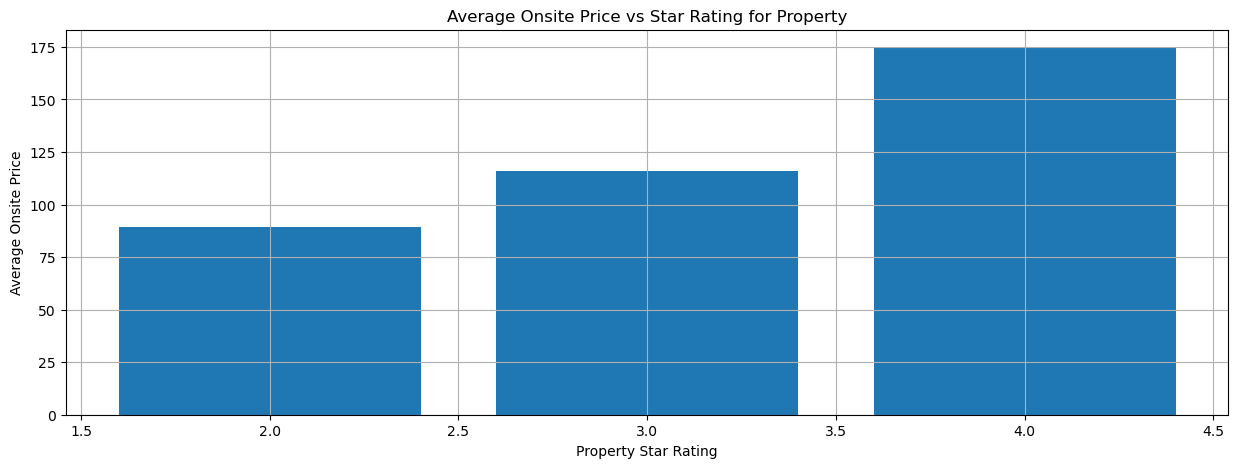

In [27]:
# Your code to answer Question 5
Property_Price = all_data[['propertycode', 'id', 'starrating', 'replaced_onsiteprice']]
q5 = Property_Price.groupby('starrating')['replaced_onsiteprice'].mean()
q5 = pd.DataFrame(q5)
q5.columns = ['Average_price']
q5 = q5.reset_index()

plt.figure(figsize=(15, 5))
plt.bar(q5['starrating'], q5['Average_price'])

plt.title("Average Onsite Price vs Star Rating for Property")
plt.xlabel("Property Star Rating")
plt.ylabel("Average Onsite Price")
plt.grid(True)

### Executive Summary & Business insights:


**Note**: You need to use the cell below to write your executive summary & business insights.
If you need more space use enter to go to the next line.


To improve the hotel business, we first need to analyze the current operational status of the hotel and identify relevant trends, to provide information for business decision-making. We have conducted research in the areas of seasonal fluctuations in hotel bookings, room type preferences related to breakfast choices, hotel distribution in top tourist countries, the impact of discounts on housing utilization, and the impact of real estate star ratings on pricing dynamics.

Firstly, a bar chart displaying hotel bookings by month indicates a clear seasonal pattern. The booking volume for the 12th month has significantly increased, indicating that holiday travel may be the peak season. The lowest booking volume occurred in the first month, which may be attributed to a decrease in post-holiday travel volume. Secondly, the line chart reveals the correlation between room type and the likelihood of choosing breakfast. As room types evolve from triple rooms to more advanced options such as double or double beds, the possibility of including breakfast at the time of booking increases. This indicates that guests who choose higher-end room types are more inclined to include breakfast. Thirdly, the line chart shows that the UK has the highest number of hotels among the top ten countries, followed by France, while the number of hotels in other popular destinations is gradually decreasing. This distribution implies market saturation in some regions, while others have growth potential. Fourthly, the scatter plot indicates that higher discounts do not necessarily lead to higher housing utilization rates. On the contrary, there are significant differences in utilization rates among different discount levels. Finally, the line chart illustrates the positive correlation between the star rating of real estate and its average on-site price. Due to perceived value, convenience, and service quality, this supports the premium pricing strategy commonly used by properties with higher ratings.

Based on the above analysis, we believe that the following improvements can be made in relevant fields. Firstly, in response to the seasonal pattern of the hotel, the hotel should develop a strong pricing and marketing strategy, utilizing peak season while exploring opportunities to increase off-peak bookings, possibly through off-season promotions or collaborating with event planners. Secondly, hotels should offer premium breakfast options and packages for their deluxe rooms. Consider adding breakfast options to these room types during the booking process. This can provide guests of high-end room types with a more inclusive experience. Customizing breakfast services and packages for these room types can improve customer satisfaction and increase revenue. Thirdly, market research can be conducted in countries with fewer hotels to identify expansion opportunities, especially in countries where the tourism industry is on the rise. Fourthly, hotels should reassess their discount strategies, possibly integrating loyalty programs or time-sensitive transactions, to improve housing utilization without affecting revenue. More consideration of competitive prices, guest experience, and value-added services may lead to better occupancy rates. Finally, hotels should regularly evaluate their competitive landscape to ensure that prices match the hotel's star rating and guest expectations. Invest in quality improvement to provide higher prices for higher star-rated properties. Maintain a balance between pricing and service delivery to ensure sustained occupancy rates and customer loyalty.

Through these improvements, hotels can better enhance their service quality and revenue.

### Grading:

PART 1 - 75 points (85 points with the extra credits in the Bonus Question)

- Question 1: 9 points (6 points for part (a) and 3 points for part (b))
- Question 2: 15 points (9 points for part (a) and 6 points for part (b))
- Question 3: 12 points (9 points for part (a) and 3 points for part (b))
- Question 4: 21 points (9 points for part (a) and 12 points for part (b))
- Question 5: 18 points (9 points for part (a) and 9 points for part (b))
- Bonus Question: 10 points (extra credit): (8 points for part (a) and 2 points for part (b))




PART 2 - 25 points 
- You need to ask five business-related questions (5 points).
- You need to answer these five questions using Python and the two datasets (5 points).
- You need to have at least "5" graphs to visualize your insights (6 points).
- Your executive summary should be well-written (6 points).
- Your results and business insights should be interesting and meaningful (3 points).


Good Luck!